In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import spearmanr
from scipy.stats import pearsonr
import seaborn as sns
from tqdm import tqdm

matplotlib.rc('font', size=14)

In [2]:
outpath = "/oak/stanford/groups/horence/JuliaO/visium_analysis/notebooks/output/visium_correlations/"

In [3]:
samples = pd.read_csv("output/make_samplesheet/spatial.csv",index_col = 0)
samples

,method,spliz_vals,readzs_vals,ge_vals,tissue,image,metadata,pixcorr_ge,pixcorr_readzs,pixcorr_spliz,readzs_ge
dataname,,,,,,,,,,,
V1_Mouse_Brain_Sagittal_Posterior,visium,/oak/stanford/groups/horence/JuliaO/nf-spliz-o...,/oak/stanford/groups/horence/JuliaO/data/visiu...,/scratch/groups/horence/JuliaO/single_cell/spa...,Brain,/oak/stanford/groups/horence/JuliaO/data/visiu...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/oak/stanford/groups/horence/JuliaO/visium_ana...
V1_Mouse_Brain_Sagittal_Posterior_Section_2,visium,/oak/stanford/groups/horence/JuliaO/nf-spliz-o...,/oak/stanford/groups/horence/JuliaO/data/visiu...,/scratch/groups/horence/JuliaO/single_cell/spa...,Brain,/oak/stanford/groups/horence/JuliaO/data/visiu...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/oak/stanford/groups/horence/JuliaO/visium_ana...
V1_Mouse_Brain_Sagittal_Anterior,visium,/oak/stanford/groups/horence/JuliaO/nf-spliz-o...,/oak/stanford/groups/horence/JuliaO/data/visiu...,/scratch/groups/horence/JuliaO/single_cell/spa...,Brain,/oak/stanford/groups/horence/JuliaO/data/visiu...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/oak/stanford/groups/horence/JuliaO/visium_ana...
V1_Mouse_Brain_Sagittal_Anterior_Section_2,visium,/oak/stanford/groups/horence/JuliaO/nf-spliz-o...,/oak/stanford/groups/horence/JuliaO/data/visiu...,/scratch/groups/horence/JuliaO/single_cell/spa...,Brain,/oak/stanford/groups/horence/JuliaO/data/visiu...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/oak/stanford/groups/horence/JuliaO/visium_ana...
V1_Mouse_Kidney,visium,/oak/stanford/groups/horence/JuliaO/nf-spliz-o...,/oak/stanford/groups/horence/JuliaO/data/visiu...,/scratch/groups/horence/JuliaO/single_cell/spa...,Kidney,/oak/stanford/groups/horence/JuliaO/data/visiu...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,/oak/stanford/groups/horence/JuliaO/visium_ana...
10X_P1_1,10x,/oak/stanford/groups/horence/JuliaO/nf-spliz-o...,/oak/stanford/groups/horence/JuliaO/nf-readzs/...,NaN,Kidney,NaN,/scratch/groups/horence/JuliaO/single_cell/spa...,NaN,NaN,NaN,NaN
cta_ucsf-1-5_liver,visium,/oak/stanford/groups/horence/JuliaO/nf-spliz-o...,NaN,/scratch/groups/horence/JuliaO/single_cell/spa...,Liver,/oak/stanford/groups/horence/JuliaO/data/visiu...,/scratch/groups/horence/JuliaO/single_cell/spa...,/scratch/groups/horence/JuliaO/single_cell/spa...,NaN,/scratch/groups/horence/JuliaO/single_cell/spa...,NaN
BICCN_10x_426003,10x,/oak/stanford/groups/horence/rob/isoform_local...,NaN,NaN,Brain,NaN,NaN,NaN,NaN,NaN,NaN
BICCN_10x_427378,10x,/oak/stanford/groups/horence/rob/isoform_local...,NaN,NaN,Brain,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
dataname = "V1_Mouse_Kidney"
row = samples.loc[dataname]
thresh = 100
num_genes = 1000
val = "ReadZS"
if val == "ReadZS":
  cell_id = "cell_id"
  val = "z_scaled"
  genecol = "window"
  valpath = "readzs_vals"
elif val == "SpliZ":
  cell_id = "cell"
  genecol = "gene"
  valpath = "spliz_vals"
elif val == "ge":
  cell_id = "cell_id"
  val = "frac_count"
  genecol = "gene"
  valpath = "ge_vals"
   
df = pd.read_csv(row[valpath],sep="\t")
display(df.shape)
vc = df[genecol].value_counts()
vc = vc.head(num_genes)
df = df[df[genecol].isin(vc[vc > thresh].index)]
display(df.shape)

(6884120, 18)

(1251924, 18)

In [17]:
vis_windows = set(df[genecol].unique())

In [ ]:
df_10x["window"].intersection(df)

In [53]:
display(df.shape)
df = df[df[genecol].isin(both_readzs)]
df.shape

(7044082, 10)

(6629290, 10)

In [18]:
df_10x = pd.read_csv(samples.loc["10X_P1_1"][valpath],sep="\t")
display(df_10x.shape)
# vc = df_10x[genecol].value_counts()
# vc = vc.head(num_genes)
# df_10x = df_10x[df_10x[genecol].isin(vc[vc > thresh].index)]
df_10x = df_10x[df_10x[genecol].isin(vis_windows)]
display(df_10x.shape)

(12519672, 22)

(3116489, 22)

In [13]:
both_readzs = set(df_10x["window"].unique()).intersection(set(df["window"].unique()))
len(both_readzs)

17561

In [19]:
len(set(df_10x["window"].unique()))

1000

In [20]:
len(set(df["window"].unique()))

1000

In [24]:
# # dataname = "V1_Mouse_Brain_Sagittal_Anterior_Section_2"
# # dataname = "V1_Mouse_Brain_Sagittal_Anterior"

# # dataname = "V1_Mouse_Brain_Sagittal_Posterior"
# dataname = "V1_Mouse_Kidney"


# # val = "z_scaled"
# #   method = "ReadZS"
# # genecol = "window"
# # val_path = "/oak/stanford/groups/horence/JuliaO/data/visium/{}/{}_all_5000.zscore".format(dataname,dataname)
# # cellid = "cell_id"
# supdir = "/oak/stanford/groups/horence/JuliaO/nf-spliz-output/run_dir/visium/"

# # val_path = "/scratch/groups/horence/JuliaO/single_cell/spatial_kmers/scripts/output/parse_gene_expression/{}_sub_1000.tsv".format(dataname)
# val_path = "{}{}/SpliZ_values/{}_sym_SVD_normdonor_S_0.1_z_0.0_b_5_r_0.01_subcol.tsv".format(supdir,dataname,dataname)


# # dataname = "10X_P1_1"
# # val_path = "/oak/stanford/groups/horence/JuliaO/nf-spliz-output/run_dir/tabula_muris/10X_P1_1/SpliZ_values/10X_P1_1_sym_SVD_normdonor_S_0.1_z_0.0_b_5_r_0.01_subcol.tsv"

# # val = "frac_count"
# # cell_id = "cell_id"

# # dataname = "BICCN_10x_426003"
# # dataname = "BICCN_10x_427378"
# # dataname = "BICCN_10x_457909"
# # dataname = "BICCN_10x_457911"
# # val_path = "/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/outputs/spliz/{}_sym_SVD_normdonor_S_0.1_z_0.0_b_5_subcol.tsv".format(dataname)

# val = "scZ"
# cell_id = "cell"

# # val_path = "/oak/stanford/groups/horence/JuliaO/nf-spliz-output/run_dir/visium/V1_Mouse_Brain_Sagittal_Anterior/SpliZ_values/V1_Mouse_Brain_Sagittal_Anterior_sym_SVD_normdonor_S_0.1_z_0.0_b_5_r_0.01_subcol.tsv"
# df = pd.read_csv(val_path,sep="\t")

In [8]:
spliz_genes = set(df["gene"].unique())

In [49]:
genedf = df
genedf

,gene,ensembl,frac_count,barcode,in_tissue,array_row,array_col,xcoord,ycoord,cell_id,plot_xcoord,plot_ycoord,pixval,pixquant,window_5000_min,window_5000_max,bool,num_spot_nnz
0,Mrpl15,ENSMUSG00000033845,0.000000,AAACCGTTCGTCCAGG-1,1,52,42,7307,4116,V1_Mouse_Kidney_AAACCGTTCGTCCAGG,4116,-7307,81,0,955.0,958.0,0,1127
1,Lypla1,ENSMUSG00000025903,0.000094,AAACCGTTCGTCCAGG-1,1,52,42,7307,4116,V1_Mouse_Kidney_AAACCGTTCGTCCAGG,4116,-7307,81,0,962.0,970.0,1,1354
2,Tcea1,ENSMUSG00000033813,0.000047,AAACCGTTCGTCCAGG-1,1,52,42,7307,4116,V1_Mouse_Kidney_AAACCGTTCGTCCAGG,4116,-7307,81,0,972.0,980.0,1,1088
3,Atp6v1h,ENSMUSG00000033793,0.000141,AAACCGTTCGTCCAGG-1,1,52,42,7307,4116,V1_Mouse_Kidney_AAACCGTTCGTCCAGG,4116,-7307,81,0,1015.0,1033.0,1,1327
4,Pcmtd1,ENSMUSG00000051285,0.000047,AAACCGTTCGTCCAGG-1,1,52,42,7307,4116,V1_Mouse_Kidney_AAACCGTTCGTCCAGG,4116,-7307,81,0,1418.0,1435.0,1,1128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5058879,mt-Nd3,ENSMUSG00000064360,0.004632,TTGTTTCACATCCAGG-1,1,58,42,8025,4113,V1_Mouse_Kidney_TTGTTTCACATCCAGG,4113,-8025,86,2,2.0,2.0,1,1434
5058880,mt-Nd4l,ENSMUSG00000065947,0.000220,TTGTTTCACATCCAGG-1,1,58,42,8025,4113,V1_Mouse_Kidney_TTGTTTCACATCCAGG,4113,-8025,86,2,2.0,3.0,1,1259
5058881,mt-Nd4,ENSMUSG00000064363,0.009063,TTGTTTCACATCCAGG-1,1,58,42,8025,4113,V1_Mouse_Kidney_TTGTTTCACATCCAGG,4113,-8025,86,2,3.0,3.0,1,1436
5058882,mt-Nd5,ENSMUSG00000064367,0.000604,TTGTTTCACATCCAGG-1,1,58,42,8025,4113,V1_Mouse_Kidney_TTGTTTCACATCCAGG,4113,-8025,86,2,3.0,3.0,1,1429


In [53]:

gene = "Myl6"
merged = genedf[genedf["gene"] == gene][["cell_id","frac_count"]].merge(splizdf[splizdf["gene"] == gene][["cell","scZ"]],left_on = "cell_id", right_on = "cell")
res = spearmanr(merged["frac_count"],merged["scZ"])
res

SpearmanrResult(correlation=0.25248274543656324, pvalue=1.4245039930678632e-19)

In [58]:
merged.sort_values("scZ")

,cell_id,frac_count,cell,scZ
200,V1_Mouse_Kidney_AGTCGACGGTCTCAAG,0.000721,V1_Mouse_Kidney_AGTCGACGGTCTCAAG,-0.684753
345,V1_Mouse_Kidney_CAGCAGTCTGTGCTGC,0.000804,V1_Mouse_Kidney_CAGCAGTCTGTGCTGC,-0.684753
135,V1_Mouse_Kidney_ACTGTACGATACACAT,0.001044,V1_Mouse_Kidney_ACTGTACGATACACAT,-0.684753
731,V1_Mouse_Kidney_GCTAAGTAGTTTCTCT,0.000688,V1_Mouse_Kidney_GCTAAGTAGTTTCTCT,-0.684753
360,V1_Mouse_Kidney_CATACTATGTAATTGT,0.000767,V1_Mouse_Kidney_CATACTATGTAATTGT,-0.684753
...,...,...,...,...
580,V1_Mouse_Kidney_CTGTGGTCGGGAGATA,0.001946,V1_Mouse_Kidney_CTGTGGTCGGGAGATA,1.651809
1064,V1_Mouse_Kidney_TCGGGAGACAGCGTAC,0.001810,V1_Mouse_Kidney_TCGGGAGACAGCGTAC,1.695194
522,V1_Mouse_Kidney_CTAACGAAACTTGCTG,0.002171,V1_Mouse_Kidney_CTAACGAAACTTGCTG,1.719277
1202,V1_Mouse_Kidney_TTCTATTAAACGCAGC,0.002131,V1_Mouse_Kidney_TTCTATTAAACGCAGC,1.796826


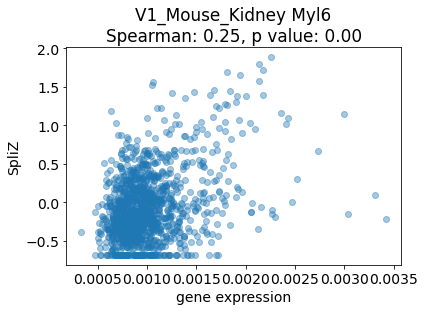

In [54]:
plt.plot(merged["frac_count"],merged["scZ"],marker="o",linestyle="",alpha = 0.4)
plt.xlabel("gene expression")
plt.ylabel("SpliZ")
plt.title("{} {}\nSpearman: {:.2f}, p value: {:.2f}".format(dataname,gene, res.correlation,res.pvalue))
plt.show()

In [59]:
splizdf[splizdf["gene"] == "Myl6"].sort_values("scZ")["scZ"]

18983   -0.684753
19200   -0.684753
19390   -0.684753
19207   -0.684753
18842   -0.684753
           ...   
18337    1.695194
18545    1.719277
19090    1.796826
18237    1.883327
19403    2.178971
Name: scZ, Length: 1316, dtype: float64

In [62]:
df = pd.read_parquet("/oak/stanford/groups/horence/JuliaO/nf-spliz-output/run_dir/visium/V1_Mouse_Kidney/SpliZ_values/V1_Mouse_Kidney_sym_SVD_normdonor_S_0.1_z_0.0_b_5_r_0.01.pq")
df

,refName_newR1,gene,juncStart,juncEnd,chrR1A,numReads,cell,barcode,in_tissue,array_row,...,zcontribEnd_rep,str_juncEnd,summed_zcontribEnd,f0,svd_z0,f1,svd_z1,f2,svd_z2,svd_z_sumsq
0,chr1:Lactb2:13626904:-|chr1:Lactb2:13627356:-|lin,Lactb2,13626904.0,13627356.0,chr1,3.0,V1_Mouse_Kidney_ATCTGGTTAAGACTGT,ATCTGGTTAAGACTGT-1,1.0,26.0,...,0.000000,13627356_End,0.000000e+00,0.999992,-0.173489,7.725114e-06,2.060798e-03,4.649595e-33,1.358182e-17,0.030103
1,chr1:Lactb2:13626904:-|chr1:Lactb2:13627356:-|lin,Lactb2,13626904.0,13627356.0,chr1,4.0,V1_Mouse_Kidney_GCTAGGCACCACGGAG,GCTAGGCACCACGGAG-1,1.0,54.0,...,0.000000,13627356_End,0.000000e+00,0.999992,-0.173489,7.725114e-06,2.060798e-03,4.649595e-33,1.358182e-17,0.030103
2,chr1:Lactb2:13626904:-|chr1:Lactb2:13627356:-|lin,Lactb2,13626904.0,13627356.0,chr1,8.0,V1_Mouse_Kidney_ATAGACGAAGAGAAAG,ATAGACGAAGAGAAAG-1,1.0,33.0,...,0.000000,13627356_End,0.000000e+00,0.999992,-0.173489,7.725114e-06,2.060798e-03,4.649595e-33,1.358182e-17,0.030103
3,chr1:Lactb2:13626904:-|chr1:Lactb2:13627356:-|lin,Lactb2,13626904.0,13627356.0,chr1,4.0,V1_Mouse_Kidney_GTGATCCTTGTCATGA,GTGATCCTTGTCATGA-1,1.0,62.0,...,0.000000,13627356_End,0.000000e+00,0.999992,-0.173489,7.725114e-06,2.060798e-03,4.649595e-33,1.358182e-17,0.030103
4,chr1:Lactb2:13626904:-|chr1:Lactb2:13627356:-|lin,Lactb2,13626904.0,13627356.0,chr1,4.0,V1_Mouse_Kidney_ACGCGGGCCAAGGACA,ACGCGGGCCAAGGACA-1,1.0,34.0,...,0.000000,13627356_End,0.000000e+00,0.999992,-0.173489,7.725114e-06,2.060798e-03,4.649595e-33,1.358182e-17,0.030103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423326,chrY:Erdr1_1:90793417:+|chrY:Erdr1_1:90816349:...,Erdr1_1,90793417.0,90816349.0,chrY,6.0,V1_Mouse_Kidney_ACGTAGATTGCTGATG,ACGTAGATTGCTGATG-1,1.0,33.0,...,-0.258199,90816349_End,-2.581989e-01,1.000000,-0.210819,2.217674e-32,-1.560169e-18,6.717909e-34,5.217558e-17,0.044444
423327,chrY:Erdr1_1:90793417:+|chrY:Erdr1_1:90816349:...,Erdr1_1,90793417.0,90816349.0,chrY,3.0,V1_Mouse_Kidney_GCAGATTAGGGATATC,GCAGATTAGGGATATC-1,1.0,37.0,...,-0.193649,90816349_End,7.745967e-01,1.000000,0.632456,2.217674e-32,-1.358560e-16,6.717909e-34,-1.162782e-16,0.400000
423328,chrY:Erdr1_1:90793680:+|chrY:Erdr1_1:90816349:...,Erdr1_1,90793680.0,90816349.0,chrY,1.0,V1_Mouse_Kidney_GCAGATTAGGGATATC,GCAGATTAGGGATATC-1,1.0,37.0,...,0.968246,90816349_End,7.745967e-01,1.000000,0.632456,2.217674e-32,-1.358560e-16,6.717909e-34,-1.162782e-16,0.400000
423329,JH584304.1:unknown:52367:?|JH584304.1:unknown:...,unknown_JH584304.1_0,52367.0,53536.0,JH584304.1,4.0,V1_Mouse_Kidney_CTAGCATAGTATAATG,CTAGCATAGTATAATG-1,1.0,34.0,...,-0.400000,53536_End,5.551115e-17,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [67]:
df[df["gene"] == "Myl6"].sort_values(["scZ","cell"])

,refName_newR1,gene,juncStart,juncEnd,chrR1A,numReads,cell,barcode,in_tissue,array_row,...,zcontribEnd_rep,str_juncEnd,summed_zcontribEnd,f0,svd_z0,f1,svd_z1,f2,svd_z2,svd_z_sumsq
40393,chr10:Myl6:128491033:-|chr10:Myl6:128492059:-|lin,Myl6,128491033.0,128492059.0,chr10,6.0,V1_Mouse_Kidney_AACCTCGCTTTAGCCC,AACCTCGCTTTAGCCC-1,1.0,62.0,...,-0.459275,128492059_End,-0.459275,0.765729,0.074426,0.110787,0.061558,0.059445,-0.613079,0.385194
40370,chr10:Myl6:128491033:-|chr10:Myl6:128492059:-|lin,Myl6,128491033.0,128492059.0,chr10,6.0,V1_Mouse_Kidney_AACGCGGTCTCCAGCC,AACGCGGTCTCCAGCC-1,1.0,23.0,...,-0.459275,128492059_End,-0.459275,0.765729,0.074426,0.110787,0.061558,0.059445,-0.613079,0.385194
39825,chr10:Myl6:128491033:-|chr10:Myl6:128492059:-|lin,Myl6,128491033.0,128492059.0,chr10,6.0,V1_Mouse_Kidney_AAGGAGCGGTTGGTGC,AAGGAGCGGTTGGTGC-1,1.0,28.0,...,-0.459275,128492059_End,-0.459275,0.765729,0.074426,0.110787,0.061558,0.059445,-0.613079,0.385194
40245,chr10:Myl6:128491033:-|chr10:Myl6:128492059:-|lin,Myl6,128491033.0,128492059.0,chr10,12.0,V1_Mouse_Kidney_AATGACAGCAATGTCT,AATGACAGCAATGTCT-1,1.0,48.0,...,-0.459275,128492059_End,-0.459275,0.765729,0.074426,0.110787,0.061558,0.059445,-0.613079,0.385194
40293,chr10:Myl6:128491033:-|chr10:Myl6:128492059:-|lin,Myl6,128491033.0,128492059.0,chr10,6.0,V1_Mouse_Kidney_ACAGGCTTGCCCGACT,ACAGGCTTGCCCGACT-1,1.0,53.0,...,-0.459275,128492059_End,-0.459275,0.765729,0.074426,0.110787,0.061558,0.059445,-0.613079,0.385194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42276,chr10:Myl6:128492745:-|chr10:Myl6:128493539:-|lin,Myl6,128492745.0,128493539.0,chr10,2.0,V1_Mouse_Kidney_TTGTTCAGTGTGCTAC,TTGTTCAGTGTGCTAC-1,1.0,24.0,...,1.797850,128493539_End,1.797850,0.765729,1.466721,0.110787,-1.122429,0.059445,2.244633,8.449497
297780,chr10:Myl6:128491764:-|chr10:Myl6:128492059:-|lin,Myl6,128491764.0,128492059.0,chr10,10.0,V1_Mouse_Kidney_TTGTTCAGTGTGCTAC,TTGTTCAGTGTGCTAC-1,1.0,24.0,...,1.776621,128492059_End,1.559069,0.765729,1.466721,0.110787,-1.122429,0.059445,2.244633,8.449497
40224,chr10:Myl6:128491033:-|chr10:Myl6:128491720:-|lin,Myl6,128491033.0,128491720.0,chr10,3.0,V1_Mouse_Kidney_AATGATGCGACTCCTG,None,NaN,NaN,...,0.826267,128491720_End,0.826267,0.765729,-0.038256,0.110787,0.029663,0.059445,2.648087,7.014710
40520,chr10:Myl6:128491033:-|chr10:Myl6:128492059:-|lin,Myl6,128491033.0,128492059.0,chr10,1.0,V1_Mouse_Kidney_AATGATGCGACTCCTG,None,NaN,NaN,...,-0.153092,128492059_End,2.097294,0.765729,-0.038256,0.110787,0.029663,0.059445,2.648087,7.014710


In [60]:
splizdf[splizdf["gene"] == "Myl6"].sort_values("scZ")

,n.g_Start,barcode,gene,in_tissue,xcoord,pixval,pixquant,svd_z1,svd_z2,array_col,...,plot_xcoord,sort_junc,svd_z_sumsq,both_ann,ontology,exon_annR1B,cell,ycoord,exon_annR1A,svd_z0
18983,12.0,CGCTTATTCCCGGTCG-1,Myl6,1.0,6107.0,75.0,0.0,0.061558,-0.613079,30.0,...,3294.0,"(128491033, 128492059)",0.385194,True,null0.0,True,V1_Mouse_Kidney_CGCTTATTCCCGGTCG,3294.0,True,0.074426
19200,6.0,NaN,Myl6,NaN,NaN,NaN,NaN,0.061558,-0.613079,NaN,...,NaN,"(128491033, 128492059)",0.385194,True,nullnan,True,V1_Mouse_Kidney_ATTCGCGCCTTGAGAG,NaN,True,0.074426
19390,6.0,CTCATTGCTCTAACAA-1,Myl6,1.0,8274.0,92.0,6.0,0.061558,-0.613079,78.0,...,6590.0,"(128491033, 128492059)",0.385194,True,null6.0,True,V1_Mouse_Kidney_CTCATTGCTCTAACAA,6590.0,True,0.074426
19207,6.0,TACTCTCCGAACAAAT-1,Myl6,1.0,3605.0,102.0,9.0,0.061558,-0.613079,81.0,...,6813.0,"(128491033, 128492059)",0.385194,True,null9.0,True,V1_Mouse_Kidney_TACTCTCCGAACAAAT,6813.0,True,0.074426
18842,6.0,AGACTGTTACCGGGTC-1,Myl6,1.0,8625.0,79.0,0.0,0.061558,-0.613079,45.0,...,4318.0,"(128491033, 128492059)",0.385194,True,null0.0,True,V1_Mouse_Kidney_AGACTGTTACCGGGTC,4318.0,True,0.074426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18337,41.0,TCGGGAGACAGCGTAC-1,Myl6,1.0,8152.0,90.0,4.0,-1.224991,1.961352,71.0,...,6109.0,"(128491033, 128492059)",8.040171,True,null4.0,True,V1_Mouse_Kidney_TCGGGAGACAGCGTAC,6109.0,True,1.640935
18545,24.0,CTAACGAAACTTGCTG-1,Myl6,1.0,4685.0,85.0,1.0,-0.125370,1.886639,94.0,...,7704.0,"(128491033, 128491720)",8.857241,True,null1.0,True,V1_Mouse_Kidney_CTAACGAAACTTGCTG,7704.0,True,2.298286
19090,47.0,TTCTATTAAACGCAGC-1,Myl6,1.0,9106.0,81.0,0.0,-0.129638,2.019515,55.0,...,5004.0,"(128491033, 128491720)",9.227984,True,null0.0,True,V1_Mouse_Kidney_TTCTATTAAACGCAGC,5004.0,True,2.265555
18237,34.0,TTGTTCAGTGTGCTAC-1,Myl6,1.0,3960.0,84.0,1.0,-1.122429,2.244633,64.0,...,5642.0,"(128491033, 128492059)",8.449497,True,null1.0,True,V1_Mouse_Kidney_TTGTTCAGTGTGCTAC,5642.0,True,1.466721


In [51]:
splizdf = df
df

,n.g_Start,barcode,gene,in_tissue,xcoord,pixval,pixquant,svd_z1,svd_z2,array_col,...,plot_xcoord,sort_junc,svd_z_sumsq,both_ann,ontology,exon_annR1B,cell,ycoord,exon_annR1A,svd_z0
0,3.0,ATCTGGTTAAGACTGT-1,Lactb2,1.0,4202.0,102.0,9.0,2.060798e-03,1.358182e-17,76.0,...,6467.0,"(13626904, 13627356)",0.030103,True,null9.0,True,V1_Mouse_Kidney_ATCTGGTTAAGACTGT,6467.0,True,-0.173489
1,4.0,GCTAGGCACCACGGAG-1,Lactb2,1.0,7557.0,96.0,8.0,2.060798e-03,1.358182e-17,84.0,...,7005.0,"(13626904, 13627356)",0.030103,True,null8.0,True,V1_Mouse_Kidney_GCTAGGCACCACGGAG,7005.0,True,-0.173489
2,8.0,ATAGACGAAGAGAAAG-1,Lactb2,1.0,5033.0,87.0,2.0,2.060798e-03,1.358182e-17,45.0,...,4330.0,"(13626904, 13627356)",0.030103,True,null2.0,True,V1_Mouse_Kidney_ATAGACGAAGAGAAAG,4330.0,True,-0.173489
3,4.0,GTGATCCTTGTCATGA-1,Lactb2,1.0,8514.0,89.0,4.0,2.060798e-03,1.358182e-17,84.0,...,7002.0,"(13626904, 13627356)",0.030103,True,null4.0,True,V1_Mouse_Kidney_GTGATCCTTGTCATGA,7002.0,True,-0.173489
4,4.0,ACGCGGGCCAAGGACA-1,Lactb2,1.0,5157.0,96.0,8.0,2.060798e-03,1.358182e-17,62.0,...,5500.0,"(13626904, 13627356)",0.030103,True,null8.0,True,V1_Mouse_Kidney_ACGCGGGCCAAGGACA,5500.0,True,-0.173489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187314,NaN,TCGTCTTAGGCGTTAA-1,"Ctps2,S100g",1.0,7437.0,89.0,4.0,-3.949341e-03,-2.325284e-03,83.0,...,6937.0,"(162962240, 162964062)",0.000033,True,null4.0,True,V1_Mouse_Kidney_TCGTCTTAGGCGTTAA,6937.0,True,-0.003428
187315,NaN,TTACTCCGGCCGGGAA-1,Erdr1_1,1.0,5160.0,99.0,9.0,-1.560169e-18,5.217558e-17,78.0,...,6601.0,"(90793417, 90816349)",0.044444,True,null9.0,True,V1_Mouse_Kidney_TTACTCCGGCCGGGAA,6601.0,True,-0.210819
187316,NaN,ACGTAGATTGCTGATG-1,Erdr1_1,1.0,5038.0,91.0,5.0,-1.560169e-18,5.217558e-17,67.0,...,5844.0,"(90793417, 90816349)",0.044444,True,null5.0,True,V1_Mouse_Kidney_ACGTAGATTGCTGATG,5844.0,True,-0.210819
187317,NaN,GCAGATTAGGGATATC-1,Erdr1_1,1.0,5516.0,92.0,6.0,-1.358560e-16,-1.162782e-16,61.0,...,5430.0,"(90793417, 90816349)",0.400000,True,null6.0,True,V1_Mouse_Kidney_GCAGATTAGGGATATC,5430.0,True,0.632456


In [8]:
splizdf.columns

Index(['f2', 'f1', 'svd_z_sumsq', 'dummy', 'both_ann', 'barcode',
       'plot_ycoord', 'array_row', 'svd_z1', 'xcoord', 'gene', 'cell',
       'exon_annR1B', 'array_col', 'exon_annR1A', 'in_tissue', 'sort_junc',
       'n.g_Start', 'svd_z2', 'pixquant', 'pixval', 'ycoord', 'plot_xcoord',
       'n.g_End', 'f0', 'ontology', 'svd_z0', 'scZ'],
      dtype='object')

In [87]:
set2 = set(df["gene"].unique())

In [88]:
print(len(set1))
print(len(set2))
print(len(set1.union(set2)))

251
304
348


In [59]:
set1 = set(df["gene"].unique())

In [35]:
# df = df[df["gene"].isin(set1.union(set2))]
df = df[df["gene"].isin(spliz_genes)]

In [21]:
mat = pd.DataFrame(index=df[cell_id].unique(),columns=sorted(df[genecol].unique()))

for gene, gene_df in tqdm(df.groupby(genecol)):
  mat[gene] = mat.index.map({k : v for k, v in zip(gene_df[cell_id],gene_df[val])})
  

100%|██████████| 1000/1000 [00:05<00:00, 187.02it/s]


In [23]:
mat.shape

(1437, 1000)

In [35]:
out = {"gene1" : [], "gene2" : [], "spearman_corr" : [], "spearman_pval" : [], "n" : []}
genes = mat.columns
for i in tqdm(range(mat.shape[1] - 1)):
  for j in range(i + 1, mat.shape[1]):
    temp = mat[[genes[i],genes[j]]].dropna()
    if temp.shape[0] > 1:
      val = spearmanr(temp)
      out["gene1"].append(genes[i])
      out["gene2"].append(genes[j])
      out["spearman_corr"].append(val.correlation)
      out["spearman_pval"].append(val.pvalue)
      out["n"].append(temp.shape[0])
pd.DataFrame.from_dict(out)

  5%|▍         | 45/999 [01:29<31:44,  2.00s/it]


KeyboardInterrupt: 

In [34]:
pd.DataFrame.from_dict(out).sort_values("spearman_pval")

,gene1,gene2,spearman_corr,spearman_pval,n
1777,chr10_12061_plus,chr7_20766_minus,-0.226700,4.709178e-18,1424
1419,chr10_12061_plus,chr19_1997_plus,0.196984,6.359340e-14,1424
1776,chr10_12061_plus,chr7_20763_minus,-0.187910,9.099132e-13,1422
1149,chr10_12061_plus,chr11_6460_plus,0.180725,6.398407e-12,1424
1929,chr10_12061_plus,chr9_15696_minus,-0.164016,4.850384e-10,1423
...,...,...,...,...,...
3054,chr10_1408_plus,chr11_10450_plus,-0.000045,9.988910e-01,964
799,chr10_11563_plus,chr7_25586_minus,-0.000030,9.991545e-01,1231
3000,chr10_1408_plus,chr10_15188_plus,-0.000018,9.995136e-01,1154
1240,chr10_12061_plus,chr14_3963_minus,-0.000005,9.998695e-01,1147


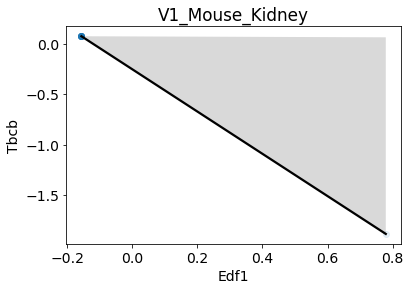

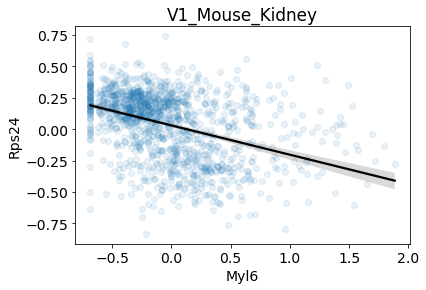

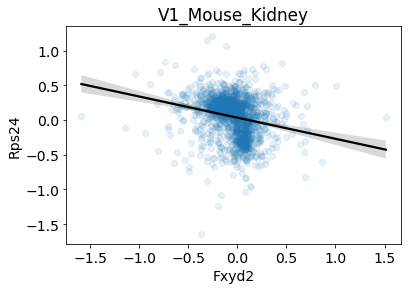

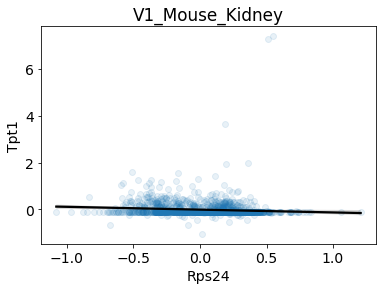

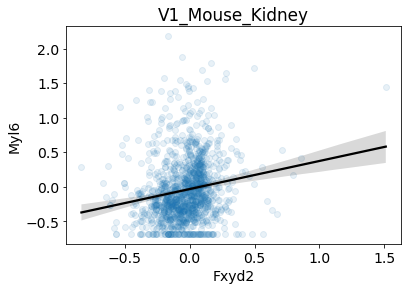

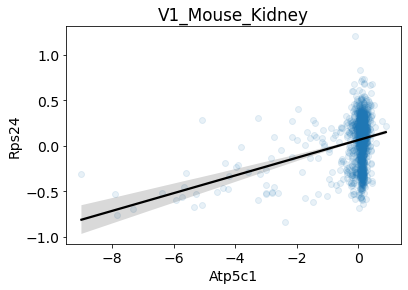

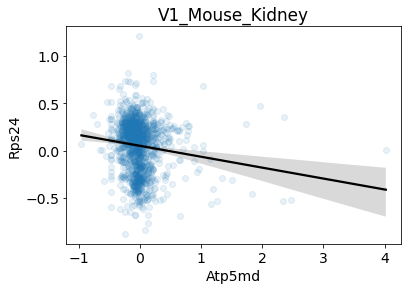

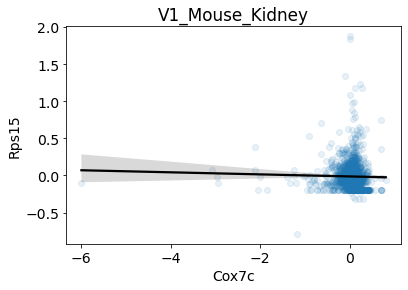

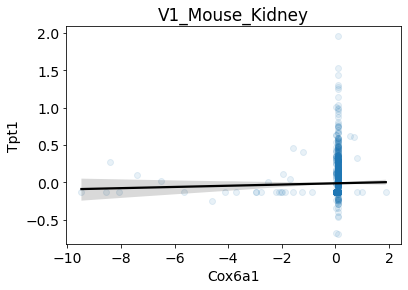

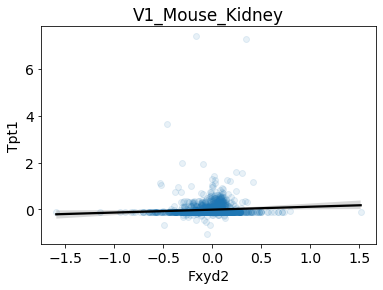

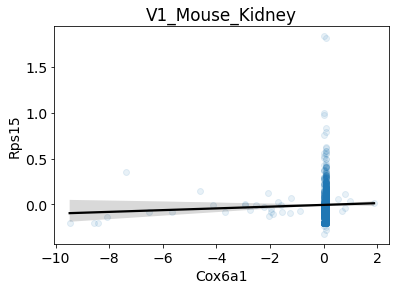

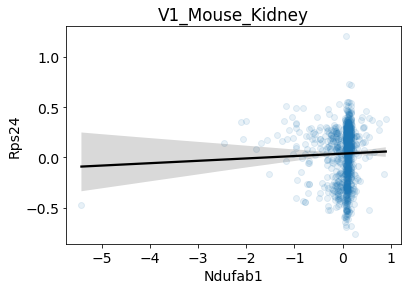

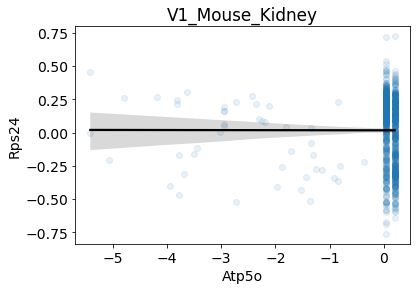

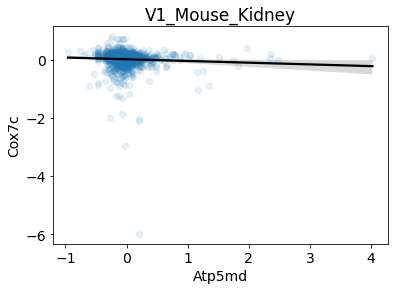

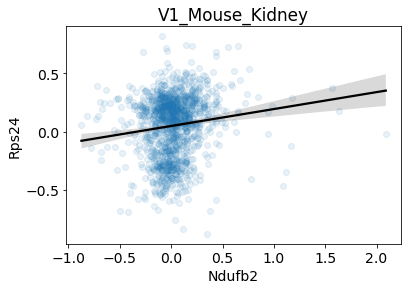

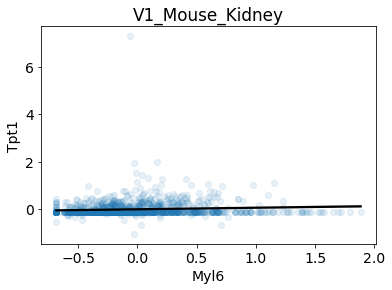

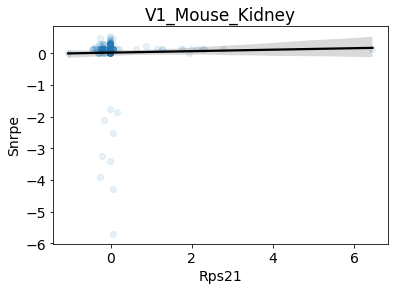

In [48]:
num_plot = 100
# xgenes = list(outdf["gene1"].head(num_plot))
# ygenes = list(outdf["gene2"].head(num_plot))

xgenes = ['Edf1', 'Myl6', 'Fxyd2', 'Rps24', 'Fxyd2', 'Atp5c1', 'Atp5md', 'Cox7c', 'Cox6a1', 'Fxyd2', 'Cox6a1', 'Ndufab1', 'Atp5o', 'Atp5md', 'Ndufb2', 'Myl6', 'Rps21']
ygenes = ['Tbcb', 'Rps24', 'Rps24', 'Tpt1', 'Myl6', 'Rps24', 'Rps24', 'Rps15', 'Tpt1', 'Tpt1', 'Rps15', 'Rps24', 'Rps24', 'Cox7c', 'Rps24', 'Tpt1', 'Snrpe']

# xgene = "Myl6"
# ygene = "Rps24"

for i in range(len(xgenes)):
  xgene = xgenes[i]
  ygene = ygenes[i]
#   plt.plot(mat[xgene],mat[ygene],linestyle="",marker="o",alpha = 0.1)
#   plt.xlabel(xgene)
#   plt.ylabel(ygene)
#   plt.title(dataname)
#   plt.show()
  try:
    sns.regplot(x=xgene,y=ygene,data=mat,scatter_kws={"alpha":0.1},line_kws={"color":"black"})
    plt.title(dataname)
    plt.savefig("{}{}_{}_{}.png".format(outpath,xgene,ygene,dataname))
    plt.show()
  except:
    print(xgene,ygene)

In [16]:
list(xgenes)

['Edf1',
 'Myl6',
 'Fxyd2',
 'Rps24',
 'Fxyd2',
 'Atp5c1',
 'Atp5md',
 'Cox7c',
 'Cox6a1',
 'Fxyd2']

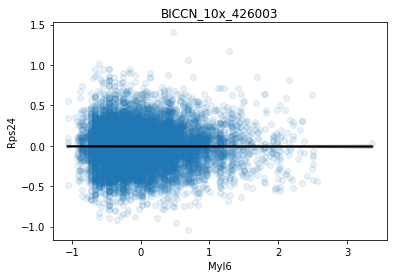

In [52]:
outdf.sort_values("spearman_pval")

,gene1,gene2,spearman_corr,spearman_pval,n
4239,Gas5,Myl6,-0.121636,2.922535e-08,2066
5545,Myl6,Rps24,-0.100623,8.751808e-07,2379
3167,Cox7b,Rpl27a,-0.103363,1.749566e-06,2130
5683,Ndufa1,Rpl35a,0.484564,3.003140e-06,84
4535,Gng13,Myl6,0.432761,3.234291e-06,107
...,...,...,...,...,...
3346,Cpne6,Hdac5,0.000000,1.000000e+00,29
4612,Grcc10,Nap1l1,0.000000,1.000000e+00,36
2091,Ckmt1,Rpl37,0.000000,1.000000e+00,200
8745,Rps8,Surf1,0.000000,1.000000e+00,26


In [33]:
x.correlation

0.18021459589764943

In [5]:
corr_mat = mat.corr(method="spearman")

/home/groups/horence/applications/anaconda3/envs/jup_env/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


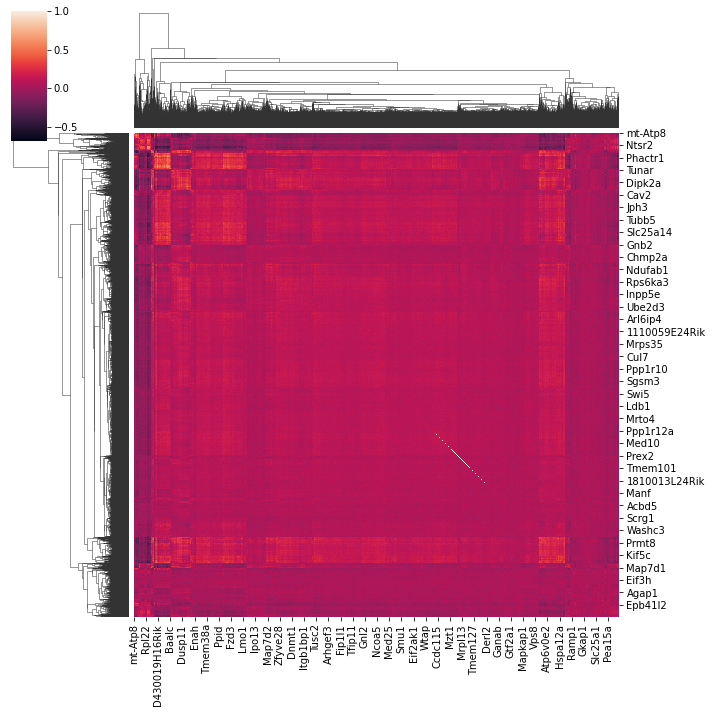

In [6]:
sns.clustermap(corr_mat.fillna(0))
plt.savefig("{}{}_{}.png".format(outpath,dataname,val))

/home/groups/horence/applications/anaconda3/envs/jup_env/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


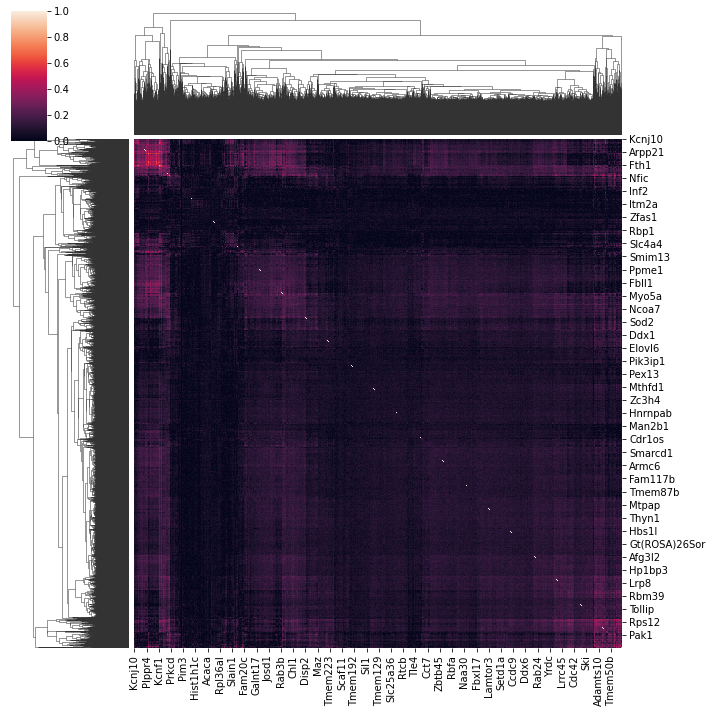

In [8]:
sns.clustermap(corr_mat.fillna(0).abs())
plt.savefig("{}{}_{}_abs.png".format(outpath,dataname,val))

In [ ]:
corr_mat.fillna(0)